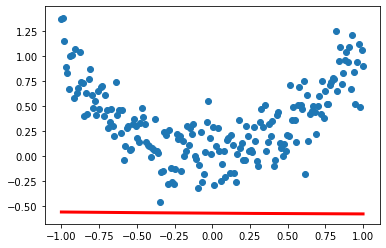

现在的损失值：0.408737
现在的损失值：0.135544
现在的损失值：0.135504
现在的损失值：0.135449
现在的损失值：0.135365
现在的损失值：0.135223
现在的损失值：0.134938
现在的损失值：0.134230
现在的损失值：0.132118
现在的损失值：0.128075
现在的损失值：0.123674
现在的损失值：0.119452
现在的损失值：0.115905
现在的损失值：0.113120
现在的损失值：0.110982
现在的损失值：0.109336
现在的损失值：0.108047
现在的损失值：0.107009
现在的损失值：0.106139
现在的损失值：0.105362
现在的损失值：0.104596
现在的损失值：0.103707
现在的损失值：0.102343
现在的损失值：0.098993
现在的损失值：0.084061
现在的损失值：0.064532
现在的损失值：0.057792
现在的损失值：0.053860
现在的损失值：0.051122
现在的损失值：0.049106
现在的损失值：0.047567
现在的损失值：0.046363
现在的损失值：0.045405
现在的损失值：0.044632
现在的损失值：0.044003
现在的损失值：0.043488
现在的损失值：0.043063
现在的损失值：0.042711
现在的损失值：0.042417
现在的损失值：0.042171
现在的损失值：0.041964
现在的损失值：0.041789
现在的损失值：0.041640
现在的损失值：0.041512
现在的损失值：0.041403
现在的损失值：0.041308
现在的损失值：0.041226
现在的损失值：0.041155
现在的损失值：0.041092
现在的损失值：0.041037
现在的损失值：0.040988
现在的损失值：0.040944
现在的损失值：0.040906
现在的损失值：0.040871
现在的损失值：0.040839
现在的损失值：0.040811
现在的损失值：0.040785
现在的损失值：0.040762
现在的损失值：0.040740
现在的损失值：0.040720


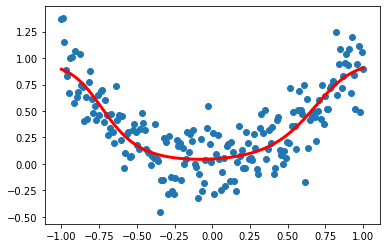

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#每层网络的权重
weights = {
    'w1': tf.Variable(tf.random_normal([1, 5]), name='w1'),
    'w2': tf.Variable(tf.random_normal([5, 3]), name='w2'),
    'out': tf.Variable(tf.random_normal([3, 1]), name='wout')
}

#每层网络的偏差
biases = {
    'b1': tf.Variable(tf.random_normal([1, 5]), name='b1'),
    'b2': tf.Variable(tf.random_normal([1, 3]), name='b2'),
    'out': tf.Variable(tf.random_normal([1,1]), name='bout')
}

#学习率
learning_rate = 0.1

#训练迭代次数
training_epochs = 6000
display_step = 100

#生成训练数据 Training Data
#使用numpy生成200个随机点
x_data=np.linspace(-1,1,200)[:, np.newaxis] #np.newaxis添加新纬度
b=np.random.normal(0,0.2, x_data.shape)
y_data=np.square(x_data)+b

xs = tf.placeholder(tf.float32, [None, 1], 'x')
ys = tf.placeholder(tf.float32, [None, 1], 'y')

def network(x, weights, biases):
    #网络第一层
    z1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    a1 = tf.nn.tanh(z1)  #使用relu激活函数

    #第二层
    z2 = tf.add(tf.matmul(a1, weights['w2']), biases['b2'])
    a2 = tf.nn.tanh(z2)   #使用relu激活函数

    #输出层
    z3 = tf.add(tf.matmul(a2, weights['out']), biases['out'])
    outputs = tf.nn.tanh(z3, name='outputs')
    return outputs

if __name__ == "__main__":
    outputs = network(xs, weights, biases)
    #定义损失函数
    cost = tf.reduce_mean(tf.square(ys - outputs))
    #优化函数(这里使用梯度下降法)
    op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    #初始化
    init =tf.global_variables_initializer()

    #训练
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    with tf.Session(config=config) as sess:
        sess.run(init)
        saver = tf.train.Saver()
        #未训练前
        Y1 = sess.run(network(xs, weights, biases), feed_dict={xs: x_data, ys: y_data})
        plt.scatter(x_data, y_data)  # 真实的散点值
        plt.plot(x_data, Y1, 'r-', lw=3)  # 预测值
        plt.show()
        #开始训练
        for i in range(training_epochs):
            sess.run(op, feed_dict={xs: x_data, ys: y_data})
            if i%display_step == 0:
                print("现在的损失值：%f"%(sess.run(cost, feed_dict={xs: x_data, ys: y_data})))

        #获取预测的Y的值
        Y = sess.run(network(xs, weights, biases), feed_dict={xs: x_data})

        plt.scatter(x_data,y_data) #真实的散点值
        plt.plot(x_data, Y, 'r-', lw=3)#预测值
        plt.show()
        saver.save(sess, 'model/LinearRegression/Linear', global_step=1)